In [1]:
### ATOC7500 Application Lab #2 - ATOC7500_applicationlab2_AR1_Nstar
### Written by Jennifer Kay (CU) and Elizabeth Maroon (CU)
### Last updated September 21, 2020

##LEARNING GOALS:
##1) Calculate the autocorrelation at a range of lags using two methods available in python (np.correlate, dot products)
##2) Estimate the effective sample size (N*) using the lag-1 autocorrelation
##3) Evaluate the influence of changing the sampling frequency on the autocorrelation and on N*.

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import xarray
import pandas as pd   ##pandas reads in .csv.
from scipy import stats
import seaborn as sns  ### seaborn just makes things pretty -- no new typing
sns.set_style('whitegrid')  ###  change away from grey grid (seaborn default) to white grid

In [2]:
## Read in the data
filename = 'christman_2016.csv'
data=pd.read_csv(filename,sep=',')
data.head()

,day,hour,temp_F,RH,dewtemp_F,wind_mph,wind_dir,windgust,windgust_dir,pres_Hg,SOLIN_Wm2,Prec_inches
0,42370,0.000000,7.0,72.2,-0.1,1.2,234,3.9,224,851.30,0.0,0.0
1,42370,0.041667,5.4,74.3,-1.0,3.4,299,7.1,302,850.82,0.0,0.0
2,42370,0.083333,6.4,73.8,-0.2,2.8,200,7.0,301,849.83,0.0,0.0
3,42370,0.125000,3.0,73.5,-3.6,2.9,309,6.1,349,850.69,0.0,0.0
4,42370,0.166667,3.7,76.9,-1.9,3.1,346,5.3,255,848.24,0.0,0.0


minimum data value:  3.6
maximum data value:  77.4


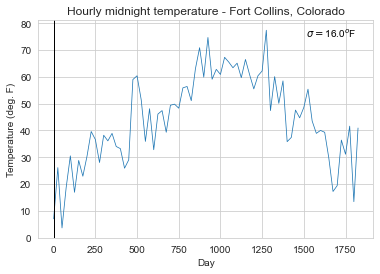

In [22]:
days = 5
## Plot midnight temperature data for Fort Collins, Colorado
X=data['temp_F']
X_daily=X[::24*days] ## sample the hourly data every 24 hours
print('minimum data value: ',X_daily.min())
print('maximum data value: ',X_daily.max())
xindex = (np.arange(0,np.size(X),1))/24*days
xindex_daily=xindex[::24*days] ## sample the index every 24 hours
plt.plot(xindex_daily, X_daily, linewidth = 0.75)
v = np.std(X_daily)
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v)) + '$^o$F', ha='right', transform=plt.gca().transAxes, color = 'k')
ymin, ymax = plt.ylim();
xmin, xmax = plt.xlim();
lines = plt.plot((xmin, xmax),(0, 0),(0, 0),(ymin, ymax));
plt.setp(lines,color='black', linewidth=1);
plt.ylim((ymin, ymax));
plt.xlim((xmin, xmax));
plt.ylabel('Temperature (deg. F)');
plt.xlabel('Day');
plt.title('Hourly midnight temperature - Fort Collins, Colorado');

In [23]:
#Find the lag-one autocorrelation (AR1)
tseries=X_daily
sigma=np.std(tseries)  ## calculate the standard deviation
mean=np.mean(tseries)  ## calculate the mean
n=len(tseries)         ## calculate the length of the timeseries
lag=1

##Create two timeseries of the data at t=t1 and t=t2; remove the mean
t1_m=tseries[0:-1*lag]-mean
t2_m=tseries[lag:]-mean
#print(t1_m.shape)
#print(t2_m.shape)

#Method #1
#Calculate the autocorrelation using numpy correlate lagN
lagNauto_np=np.correlate(t1_m,t2_m,mode='valid')/(n-lag)/(sigma**2)
print('lag',lag,'autocorrelation np.correlate:',round(lagNauto_np[0],3))

#Method #2 - direct calculation
#Calculate the autocorrelation using numpy dot
## (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.dot.html)
lagNauto=np.dot(t1_m,t2_m)/(n-lag)/sigma**2 ## Barnes Chapter 2 Eq. 68 divided by the variance
print('lag',lag,'autocorrelation direct calc:',round(lagNauto,3))

if lag==1: alpha=lagNauto

lag 1 autocorrelation np.correlate: 0.728
lag 1 autocorrelation direct calc: 0.728


In [28]:
half

37

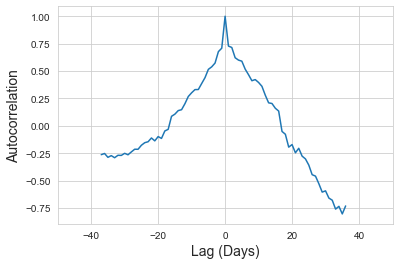

In [29]:
#Calculate the autocorrelation at all lags and plot it
tseries1=tseries-mean
half=int(len(tseries)/2)
lags=np.arange(-1*half,half,1.)
#print(len(tseries1))
#print(len(lags))
#print(len(np.correlate(tseries1,tseries1,mode='same')))
plt.plot(range(-1*half,half),np.correlate(tseries1,tseries1,mode='same')/((n-lags)*sigma**2)) ##Eq. 67 divided by variance
## note - mode='same' is chopping tseries1 so that it has the same length even when lagged.
plt.xlim([-50,50]);
# plt.ylim([0.0,1.0]);
plt.xlabel('Lag (Days)',fontsize=14);
plt.ylabel('Autocorrelation',fontsize=14);

In [25]:
## Calculate the effective sample size (N*) for this data 
## Compare your estimate of the number of independent samples (N*) with the number of samples 
## in your original data (N)
N=len(tseries)
print('# samples, N: ',N)
print('lag-1 autocorrelation: ',round(alpha,2))
print('#independent samples, N*: ',round((1-np.abs(alpha))/(1+np.abs(alpha))*N,0)) ## Chapter 2 Barnes Eq. 88
## Note that the value of the autocorrelation used in Eq. 88 should be the absolute value otherwise
## if alpha is negative you end up with more independent samples than original samples

# samples, N:  74
lag-1 autocorrelation:  0.73
#independent samples, N*:  12.0
